Data Cleaning




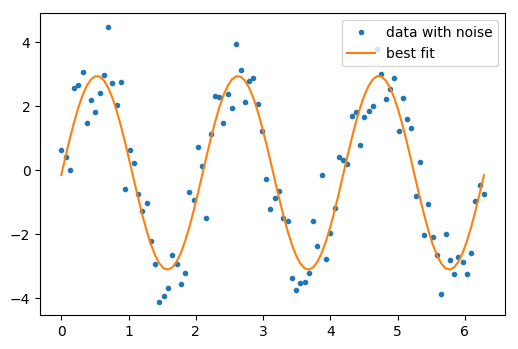

the average value is -0.0920542212279. the standard deviation is 2.27515278366
the r-square value is 0.875228717121.


In [1]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from math import pi

%matplotlib inline
from matplotlib import pyplot


# function to generate a custom sine wave
def custom_sin(t, A, phase, offset):
    return A * np.sin(t*3 + phase) + offset

# generate a sine wave with amplitude of 3, 0 phase, 0 offset, and a little gaussian noise
t = np.linspace(0, 2*pi, 100)
y = custom_sin(t, 3, 0, 0) + np.random.normal(0, 0.8, 100)

# generate a best fit curve for our generated noisey data
C = curve_fit(custom_sin, t, y, p0=[1, 0, 0])
y_fit = custom_sin(t, *C[0])

pyplot.plot(t, y, '.', label='data with noise')
pyplot.plot(t, y_fit, label='best fit')
pyplot.legend()
pyplot.show()

print('the average value is %s. the standard deviation is %s' % (np.mean(y), np.std(y)))
print('the r-square value is %s.' % r2_score(y, y_fit))

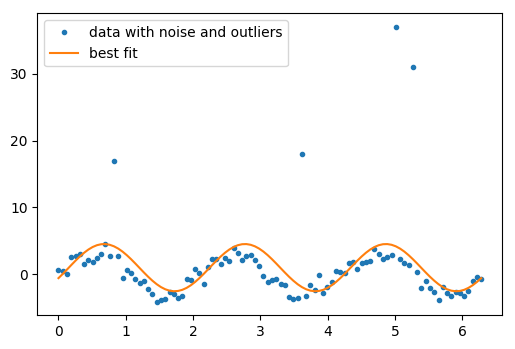

the average value is 0.948661412211. the standard deviation is 5.79060373004
the r-square value is 0.185303598381.


In [2]:
# replacing four data points from the generated sine wave with outliers
y[13] = 17
y[57] = 18
y[79] = 37
y[83] = 31

# now try to fit a sine wave to the data with outliers
C = curve_fit(custom_sin, t, y, p0=[1, 0, 0])
y_fit = custom_sin(t, *C[0])

pyplot.plot(t, y, '.', label='data with noise and outliers')
pyplot.plot(t, y_fit, label='best fit')
pyplot.legend()
pyplot.show()

print('the average value is %s. the standard deviation is %s' % (np.mean(y), np.std(y)))
print('the r-square value is %s.' % r2_score(y, y_fit))

In [3]:
def mad(x):
    xmed = np.median(x)  # calculate the median value
    return np.median(np.abs(x-xmed))  # take the median of the difference between all the x values and xmed

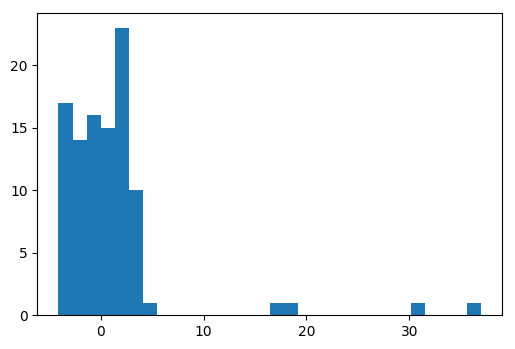

the average value is 0.948661412211. the standard deviation is 5.79060373004
the median value is 0.192161544927. the MAD is 2.08018640464


In [4]:
pyplot.hist(y, bins=30)
pyplot.show()
print('the average value is %s. the standard deviation is %s' % (np.mean(y), np.std(y)))
print('the median value is %s. the MAD is %s' % (np.median(y), mad(y)))

In [5]:
ymed = np.median(y)
ymad = mad(y)

import pandas as pd
sin_df = pd.DataFrame({'t': t, 'y': y})

In [6]:
sin_df.loc[np.abs(sin_df['y']) > ymed + 5*ymad]

,t,y
13,0.825065,17.0
57,3.617592,18.0
79,5.013855,37.0
83,5.267721,31.0


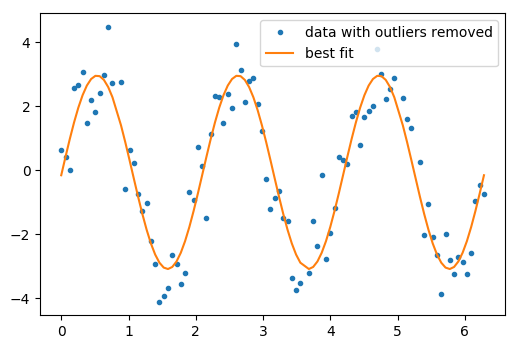

the average value is -0.0847276956131. the standard deviation is 2.28084377715
the median value is 0.0639684191445. the MAD is 2.0563794318
the r-square value is 0.872447223883.


In [7]:
sin_df_cleaned = sin_df.loc[np.abs(sin_df['y']) < ymed + 4*ymad]
y = sin_df_cleaned['y'] 
t = sin_df_cleaned['t'] 

C = curve_fit(custom_sin, t, y, p0=[1, 0, 0])
y_fit = custom_sin(t, *C[0])

pyplot.plot(t, y, '.', label='data with outliers removed')
pyplot.plot(t, y_fit, label='best fit')
pyplot.legend()
pyplot.show()

print('the average value is %s. the standard deviation is %s' % (np.mean(y), np.std(y)))
print('the median value is %s. the MAD is %s' % (np.median(y), mad(y)))
print('the r-square value is %s.' % r2_score(y, y_fit))


PCA
---


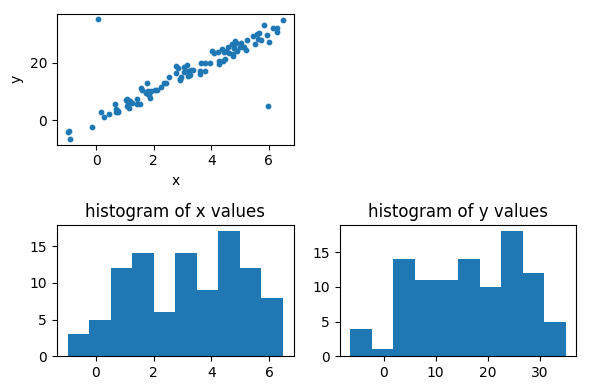

In [8]:
C0 = 1
C1 = 5

# generate a linear data with gaussian noise
x = np.linspace(0, 2*pi, 100) + np.random.normal(0, 0.5, 100)
y = C0 + C1*x + np.random.normal(0, 2, 100)

# add two outliers
y[5] = 35
y[92] = 5
pyplot.figure(1)
pyplot.subplot(221)
pyplot.scatter(x, y, s=10)
pyplot.xlabel('x')
pyplot.ylabel('y')

pyplot.subplot(223)
pyplot.hist(x)
pyplot.title('histogram of x values')

pyplot.subplot(224)
pyplot.hist(y)
pyplot.title('histogram of y values')

pyplot.tight_layout()
pyplot.show()

In [9]:
from sklearn import decomposition
import pandas as pd

# put our data in a data frame before performing PCA
X = pd.DataFrame({'x': x, 'y': y})

pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xp = pca.transform(X).T

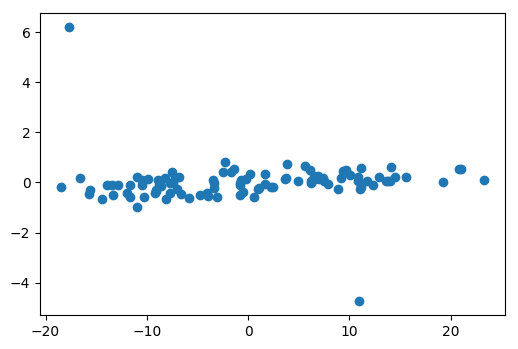

In [10]:
pyplot.scatter(Xp[0], Xp[1])
pyplot.show()

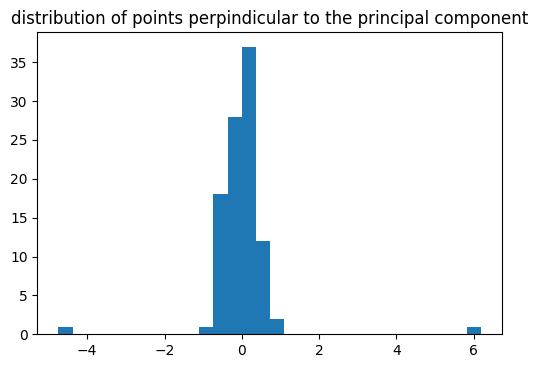

In [11]:
pyplot.hist(Xp[1], bins=30)
pyplot.title('distribution of points perpindicular to the principal component')
pyplot.show()

In [12]:
X['yp'] = Xp[1]
pmed = np.median(X['yp'])
pmad = mad(X['yp'])
print('median value: %s  MAD value: %s' % (pmed, pmad))

X.loc[np.abs(X['yp']) > pmed + 5*pmad]

median value: 0.0217781613046  MAD value: 0.210526967673


,x,y,yp
5,0.080829,35.0,6.192076
92,5.960879,5.0,-4.742234


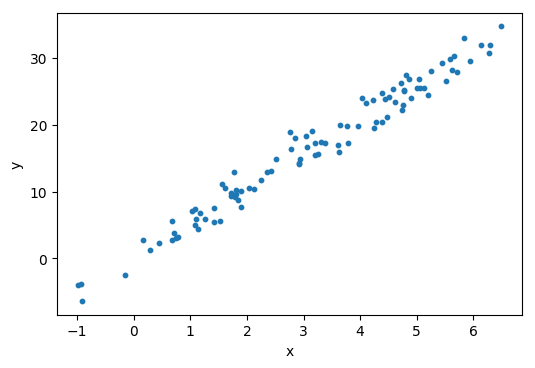

In [13]:
X_cleaned = X.loc[np.abs(X['yp']) < pmed + 4*pmad]
pyplot.scatter(X_cleaned['x'], X_cleaned['y'], s=10)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()